In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_json('ultimate_data_challenge.json')
df['last_trip_date'] = pd.to_datetime(df.last_trip_date)
df['signup_date'] = pd.to_datetime(df.signup_date)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [76]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [78]:
#inpute missing drive/passenger ratings with the means
print(df.isnull().sum())
df["avg_rating_of_driver"].fillna(df.avg_rating_of_driver.mean(),inplace=True)
df["avg_rating_by_driver"].fillna(df.avg_rating_by_driver.mean(),inplace=True)

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


In [79]:
#assuming data was pulled on 6/30/2014 because last date with data is 6/29/2014, so any driver whos' last trip was 6/1/2014 or later will be considered retained
df['retained'] = np.where(df['last_trip_date'] >= '06/01/2014', 'Yes', 'No')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,Yes
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,No
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,No
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,Yes
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,No


<AxesSubplot:xlabel='retained', ylabel='avg_rating_of_driver'>

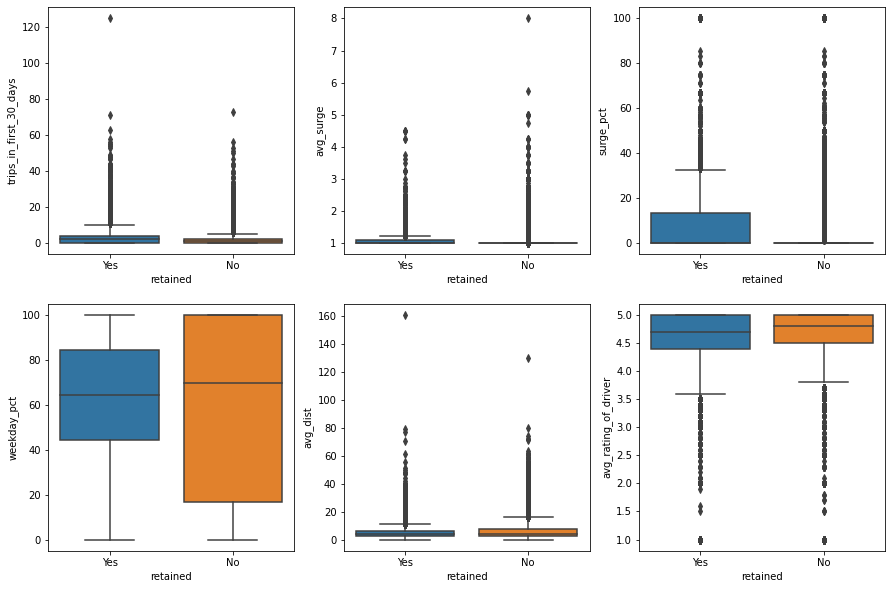

In [80]:
import seaborn as sns 
f, axes = plt.subplots(2, 3,figsize=(15,10))
sns.boxplot(  y="trips_in_first_30_days", x= "retained", data=df,  orient='v' , ax=axes[0,0])
sns.boxplot(  y="avg_surge", x= "retained", data=df,  orient='v' , ax=axes[0,1])
sns.boxplot(  y="surge_pct", x= "retained", data=df,  orient='v' , ax=axes[0,2])
sns.boxplot(  y="weekday_pct", x= "retained", data=df,  orient='v' , ax=axes[1,0])
sns.boxplot(  y="avg_dist", x= "retained", data=df,  orient='v' , ax=axes[1,1])
sns.boxplot(  y="avg_rating_of_driver", x= "retained", data=df,  orient='v' , ax=axes[1,2])

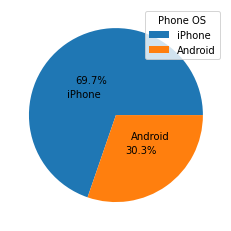

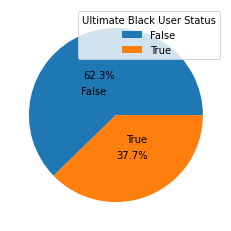

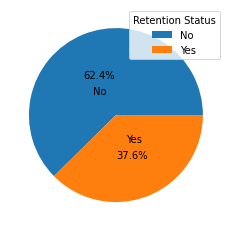

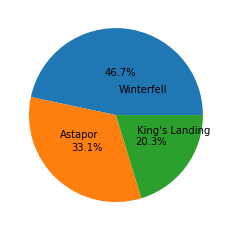

In [81]:
#pie, ax = plt.subplots(1,3,figsize=[10,6])
plt.pie(x=df.phone.value_counts(), autopct="%.1f%%", labels = df.phone.value_counts().index.tolist(), labeldistance = .3,
        pctdistance=0.5);
plt.legend(title = 'Phone OS')
plt.show()
plt.pie(x=df.ultimate_black_user.value_counts(), autopct="%.1f%%", labels = df.ultimate_black_user.value_counts().index.tolist(), labeldistance = .3,
        pctdistance=0.5);
plt.legend(title = 'Ultimate Black User Status')
plt.show()
plt.pie(x=df.retained.value_counts(), autopct="%.1f%%", labels = df.retained.value_counts().index.tolist(), labeldistance = .3,
        pctdistance=0.5);
plt.legend(title = 'Retention Status')
plt.show()
plt.pie(x=df.city.value_counts(), autopct="%.1f%%", labels = df.city.value_counts().index.tolist(), labeldistance = .3,
        pctdistance=0.5);
plt.show()

In [82]:
df = pd.get_dummies(df,columns = ['retained','phone','ultimate_black_user','city'])
df = df.drop(['signup_date','last_trip_date','retained_No','ultimate_black_user_False'], axis = 1)
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained_Yes,phone_Android,phone_iPhone,ultimate_black_user_True,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,1,0,1,0
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,1,0,1,0,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,1,0,1,0
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,1,0,0,0,0,1


In [83]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
#select target variable
y= df.retained_Yes
#predictor variables
X = df.drop('retained_Yes',axis = 1)
#split data between train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0,test_size = .3)
#standardize the training data
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [84]:
from numpy import loadtxt
from xgboost import XGBClassifier
#Create and train the model
xgb = XGBClassifier(random_state=0,learning_rate=.05,use_label_encoder=False);
xgb.fit(X_train, y_train);

[21:30:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

    Retained       0.81      0.86      0.84      9386
Not Retained       0.74      0.67      0.71      5614

    accuracy                           0.79     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.79      0.79      0.79     15000



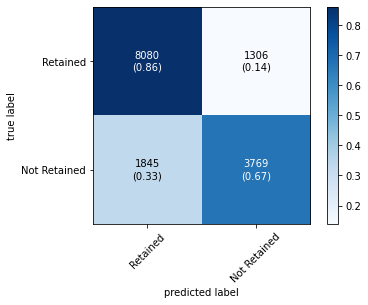

In [85]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
target_names = ['Retained','Not Retained']
#Make predictions on the test data set
y_pred = xgb.predict(X_test)
#print model performance metrics
print(classification_report(y_test, y_pred, target_names=target_names))
#visualize predictions
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   class_names = target_names,

                                   show_normed = True,
                                   colorbar = True)

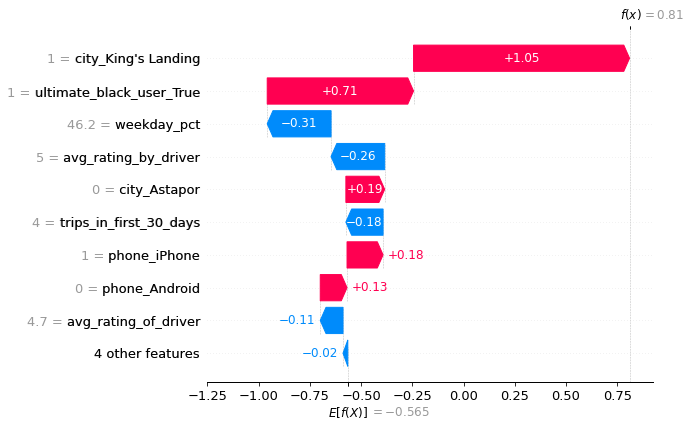

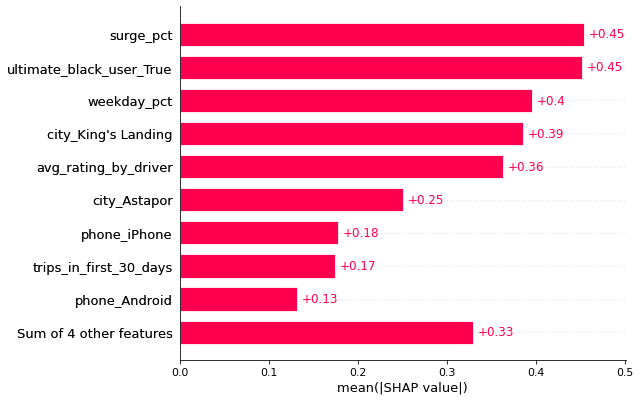

In [86]:
#Visualize the most important features
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)